In [609]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [610]:
df = pd.read_csv('covid_19_in_education.csv')

In [611]:
df.head(5)

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,Unnamed: 9,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570530e+15,17-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,NaN,1,Every day,Irregularly
1,6.440170e+15,29-03-2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,NaN,1,No,Irregularly
2,5.001170e+15,18-03-2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,NaN,1,No,There are not enough
3,5.524930e+15,24-03-2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,NaN,1,No,There are enough
4,5.032520e+15,18-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,NaN,1,No,There are not enough


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   submission_id                                                   4436 non-null   float64
 1   submission_date                                                 4436 non-null   object 
 2   gender                                                          4436 non-null   object 
 3   age                                                             4436 non-null   object 
 4   geography                                                       4436 non-null   object 
 5   financial_situation                                             4436 non-null   object 
 6   education                                                       4436 non-null   object 
 7   employment_status                                  

# Data Preprocessing

### Handling Missing Data

In [613]:
df.isnull().sum()

submission_id                                                        0
submission_date                                                      0
gender                                                               0
age                                                                  0
geography                                                            0
financial_situation                                                  0
education                                                            0
employment_status                                                    0
submission_state                                                     0
Unnamed: 9                                                        4436
can_children_observe_deterioration_of_basic_services_of_school       0
do_children_3_and_17_yrs_receive_regular_school_meals                0
are_there_teachers_at_scheduled_class_hours                          0
dtype: int64

In [614]:
df = df.drop(['Unnamed: 9'], axis=1)

In [615]:
df.isnull().sum()

submission_id                                                     0
submission_date                                                   0
gender                                                            0
age                                                               0
geography                                                         0
financial_situation                                               0
education                                                         0
employment_status                                                 0
submission_state                                                  0
can_children_observe_deterioration_of_basic_services_of_school    0
do_children_3_and_17_yrs_receive_regular_school_meals             0
are_there_teachers_at_scheduled_class_hours                       0
dtype: int64

### Handling Duplicate Data

In [616]:
df.duplicated().sum()

0

### Handling Outliers

**Gender**

In [617]:
df['gender'].value_counts()

Female                  2341
Male                    2054
Prefer not to answer      35
Non-Binary                 5
Not Available              1
Name: gender, dtype: int64

Replacing not available data with Mode of column

In [618]:
df.loc[df["gender"] == "Not Available", "gender"] = 'Female'

**Age**

In [619]:
df['age'].value_counts()

26 to 35 years old    1304
16 to 25 years old    1302
36 to 45 years old    1087
Over 45 years old      739
Not Available            3
Under 16                 1
Name: age, dtype: int64

In [620]:
df.loc[df["age"] == "Not Available", "age"] = '26 to 35 years old'

**Geography**

In [621]:
df['geography'].value_counts()

City center or metropolitan area    1920
Suburban/Peri-urban                 1374
Rural                               1141
Not Available                          1
Name: geography, dtype: int64

Replacing not available data with Mode of column

In [622]:
df.loc[df["geography"] == "Not Available", 'geography'] = 'City center or metropolitan area'

**Financial Situation**

In [623]:
df['financial_situation'].value_counts()

I can afford food, but nothing else                                                1445
I cannot afford enough food for my family                                          1163
I can afford food and regular expenses, but nothing else                           1060
I can afford food, regular expenses, and clothes, but nothing else                  244
Prefer not to answer                                                                239
I can comfortably afford food, clothes, and furniture, and I have savings           157
I can comfortably afford food, clothes, and furniture, but I don’t have savings     127
Not Available                                                                         1
Name: financial_situation, dtype: int64

Replacing not available data with Mode of column

In [624]:
df.loc[df["financial_situation"] == "Not Available", "financial_situation"] = 'I can afford food, but nothing else'

**Education**

In [625]:
df['education'].value_counts()

University or college degree completed               1327
Secondary school/ high school completed              1089
Technical school diploma or degree completed          580
Some university or college                            379
Some technical education (e.g polytechnic school)     322
Some secondary school / high school                   279
Post-graduate education                               241
Primary school completed                               98
Prefer not to answer                                   58
Some primary education                                 36
No formal education                                    20
College or university                                   3
Not available                                           1
Post graduate                                           1
Technical school                                        1
Secondary/high school                                   1
Name: education, dtype: int64

In [626]:
df.loc[df["education"] == "Secondary school/ high school completed", "education"] = 'Secondary/high school'
df.loc[df["education"] == "Some secondary school / high school", "education"] = 'Secondary/high school'
df.loc[df["education"] == "Technical school diploma or degree completed", "education"] = 'Technical school'
df.loc[df["education"] == "Some technical education (e.g polytechnic school)", "education"] = 'Technical school'
df.loc[df["education"] == "Post-graduate education", "education"] = 'Post graduate'
df.loc[df["education"] == "Not available", "education"] = 'University or college degree completed'
df.loc[df["education"] == "University or college degree completed", "education"] = 'College or university'
df.loc[df["education"] == "Some university or college", "education"] = 'College or university'
df.loc[df["education"] == "Primary school completed", "education"] = 'Primary school'
df.loc[df["education"] == "Some primary education", "education"] = 'Primary school'

In [627]:
df['education'].value_counts()

College or university    1710
Secondary/high school    1369
Technical school          903
Post graduate             242
Primary school            134
Prefer not to answer       58
No formal education        20
Name: education, dtype: int64

**Employment Status**

In [628]:
df['employment_status'].value_counts()

I work part-time, either as an employee or self-employed             1130
I work full-time, either as an employee or self-employed             1038
I am unemployed                                                       618
I am a student                                                        594
I am a student and I work part-time                                   379
I do housework, fulfilling domestic tasks, looking after children     356
None of the above                                                     165
I am retired                                                          120
I am unable to work due to long-term illness or disability             16
I am doing community or military service                               13
Employed full-time                                                      3
Not Available                                                           1
Retired                                                                 1
Student                               

In [629]:
df.loc[df["employment_status"] == "I am unemployed", "employment_status"] = 'Unemployed'
df.loc[df["employment_status"] == "I am a student", "employment_status"] = 'Student'
df.loc[df["employment_status"] == "I am retired", "employment_status"] = 'Retired'
df.loc[df["employment_status"] == "I work full-time, either as an employee or self-employed", "employment_status"] = 'Employed full-time'
df.loc[df["employment_status"] == "I work part-time, either as an employee or self-employed", "employment_status"] = 'Employed part-time'
df.loc[df["employment_status"] == "I am a student and I work part-time", "employment_status"] = 'Employed part-time'
df.loc[df["employment_status"] == "I do housework, fulfilling domestic tasks, looking after children", "employment_status"] = 'Unemployed'
df.loc[df["employment_status"] == "I am unable to work due to long-term illness or disability", "employment_status"] = 'Unemployed'
df.loc[df["employment_status"] == "I am doing community or military service", "employment_status"] = 'Unemployed'
df.loc[df["employment_status"] == "Not Available", "employment_status"] = 'Employed full-time'

In [630]:
df['employment_status'].value_counts()

Employed part-time    1509
Employed full-time    1042
Unemployed            1004
Student                595
None of the above      165
Retired                121
Name: employment_status, dtype: int64

**Submission State**

In [631]:
df['submission_state'].value_counts()

Miranda             732
Zulia               611
Distrito Federal    556
Táchira             462
Lara                354
Anzoátegui          346
Bolívar             245
Aragua              169
Sucre               164
Carabobo            161
Mérida               91
Falcón               67
Monagas              66
Guárico              58
Apure                54
Portuguesa           54
Trujillo             53
Yaracuy              48
Vargas               46
Nueva Esparta        38
Barinas              32
Cojedes              18
Delta Amacuro         9
Amazonas              2
Name: submission_state, dtype: int64

In [632]:
df['can_children_observe_deterioration_of_basic_services_of_school'].value_counts()

1    3551
0     885
Name: can_children_observe_deterioration_of_basic_services_of_school, dtype: int64

In [633]:
df['do_children_3_and_17_yrs_receive_regular_school_meals'].value_counts()

No           3838
Every day     204
2 days        154
1 day         115
3 days         91
4 days         34
Name: do_children_3_and_17_yrs_receive_regular_school_meals, dtype: int64

In [634]:
df['are_there_teachers_at_scheduled_class_hours'].value_counts()

Irregularly             2183
There are not enough    1148
There are enough        1105
Name: are_there_teachers_at_scheduled_class_hours, dtype: int64

# Exploratory Data Analysis

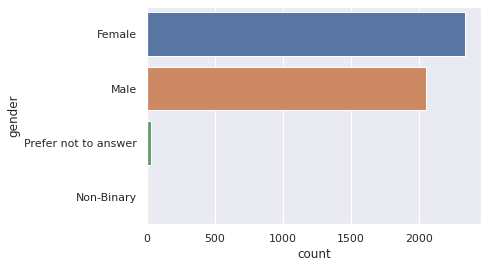

In [635]:
sns.countplot(y="gender", data=df)

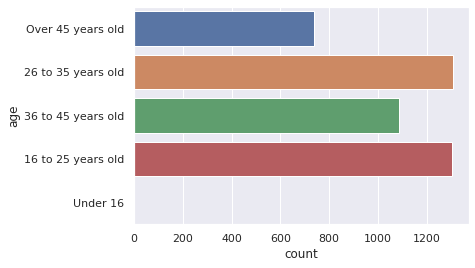

In [636]:
sns.countplot(y="age", data=df)

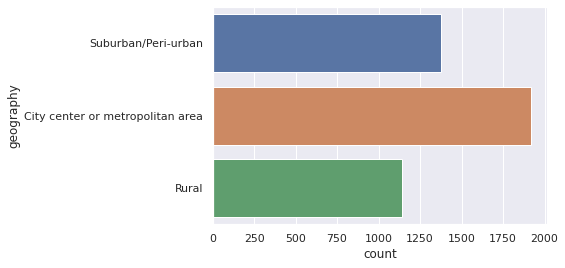

In [637]:
sns.countplot(y="geography", data=df)

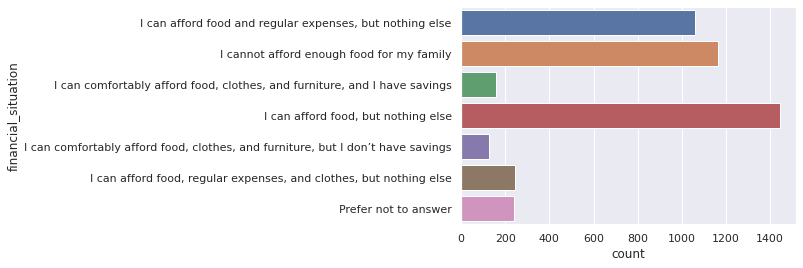

In [638]:
sns.countplot(y="financial_situation", data=df)

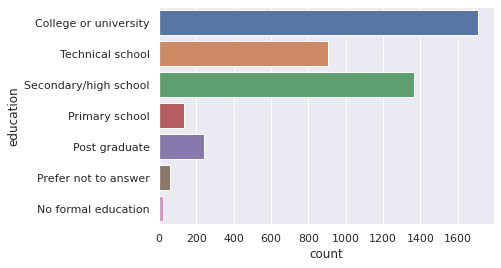

In [639]:
sns.countplot(y="education", data=df)

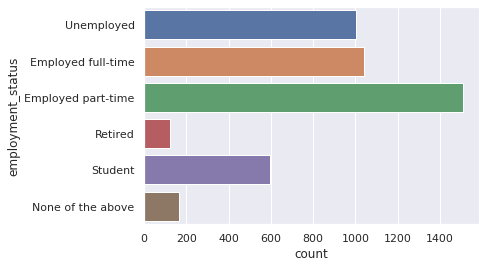

In [640]:
sns.countplot(y="employment_status", data=df)

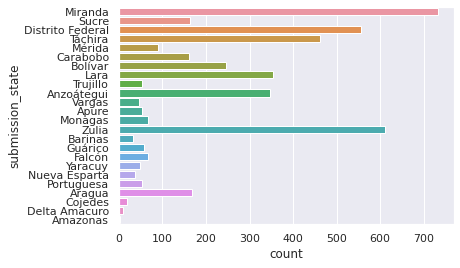

In [641]:
sns.countplot(y="submission_state", data=df)

In [642]:
num_list = ['can_children_observe_deterioration_of_basic_services_of_school','do_children_3_and_17_yrs_receive_regular_school_meals','are_there_teachers_at_scheduled_class_hours']

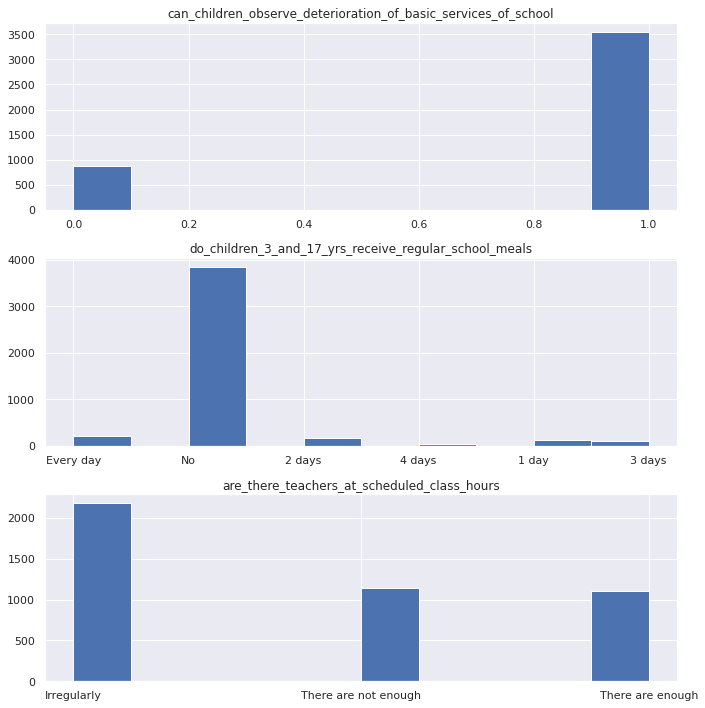

In [643]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_list)):
    
    plt.subplot(3, 1, i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

#Correlation Analysis

In [644]:
df=df.drop(['submission_date', 'submission_id'], axis=1)

In [645]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["gender","age","geography","financial_situation","education","employment_status","submission_state"])

In [646]:
one_hot_encoded_data.columns.unique()

Index(['can_children_observe_deterioration_of_basic_services_of_school',
       'do_children_3_and_17_yrs_receive_regular_school_meals',
       'are_there_teachers_at_scheduled_class_hours', 'gender_Female',
       'gender_Male', 'gender_Non-Binary', 'gender_Prefer not to answer',
       'age_16 to 25 years old', 'age_26 to 35 years old',
       'age_36 to 45 years old', 'age_Over 45 years old', 'age_Under 16',
       'geography_City center or metropolitan area', 'geography_Rural',
       'geography_Suburban/Peri-urban',
       'financial_situation_I can afford food and regular expenses, but nothing else',
       'financial_situation_I can afford food, but nothing else',
       'financial_situation_I can afford food, regular expenses, and clothes, but nothing else',
       'financial_situation_I can comfortably afford food, clothes, and furniture, and I have savings',
       'financial_situation_I can comfortably afford food, clothes, and furniture, but I don’t have savings',
       'f

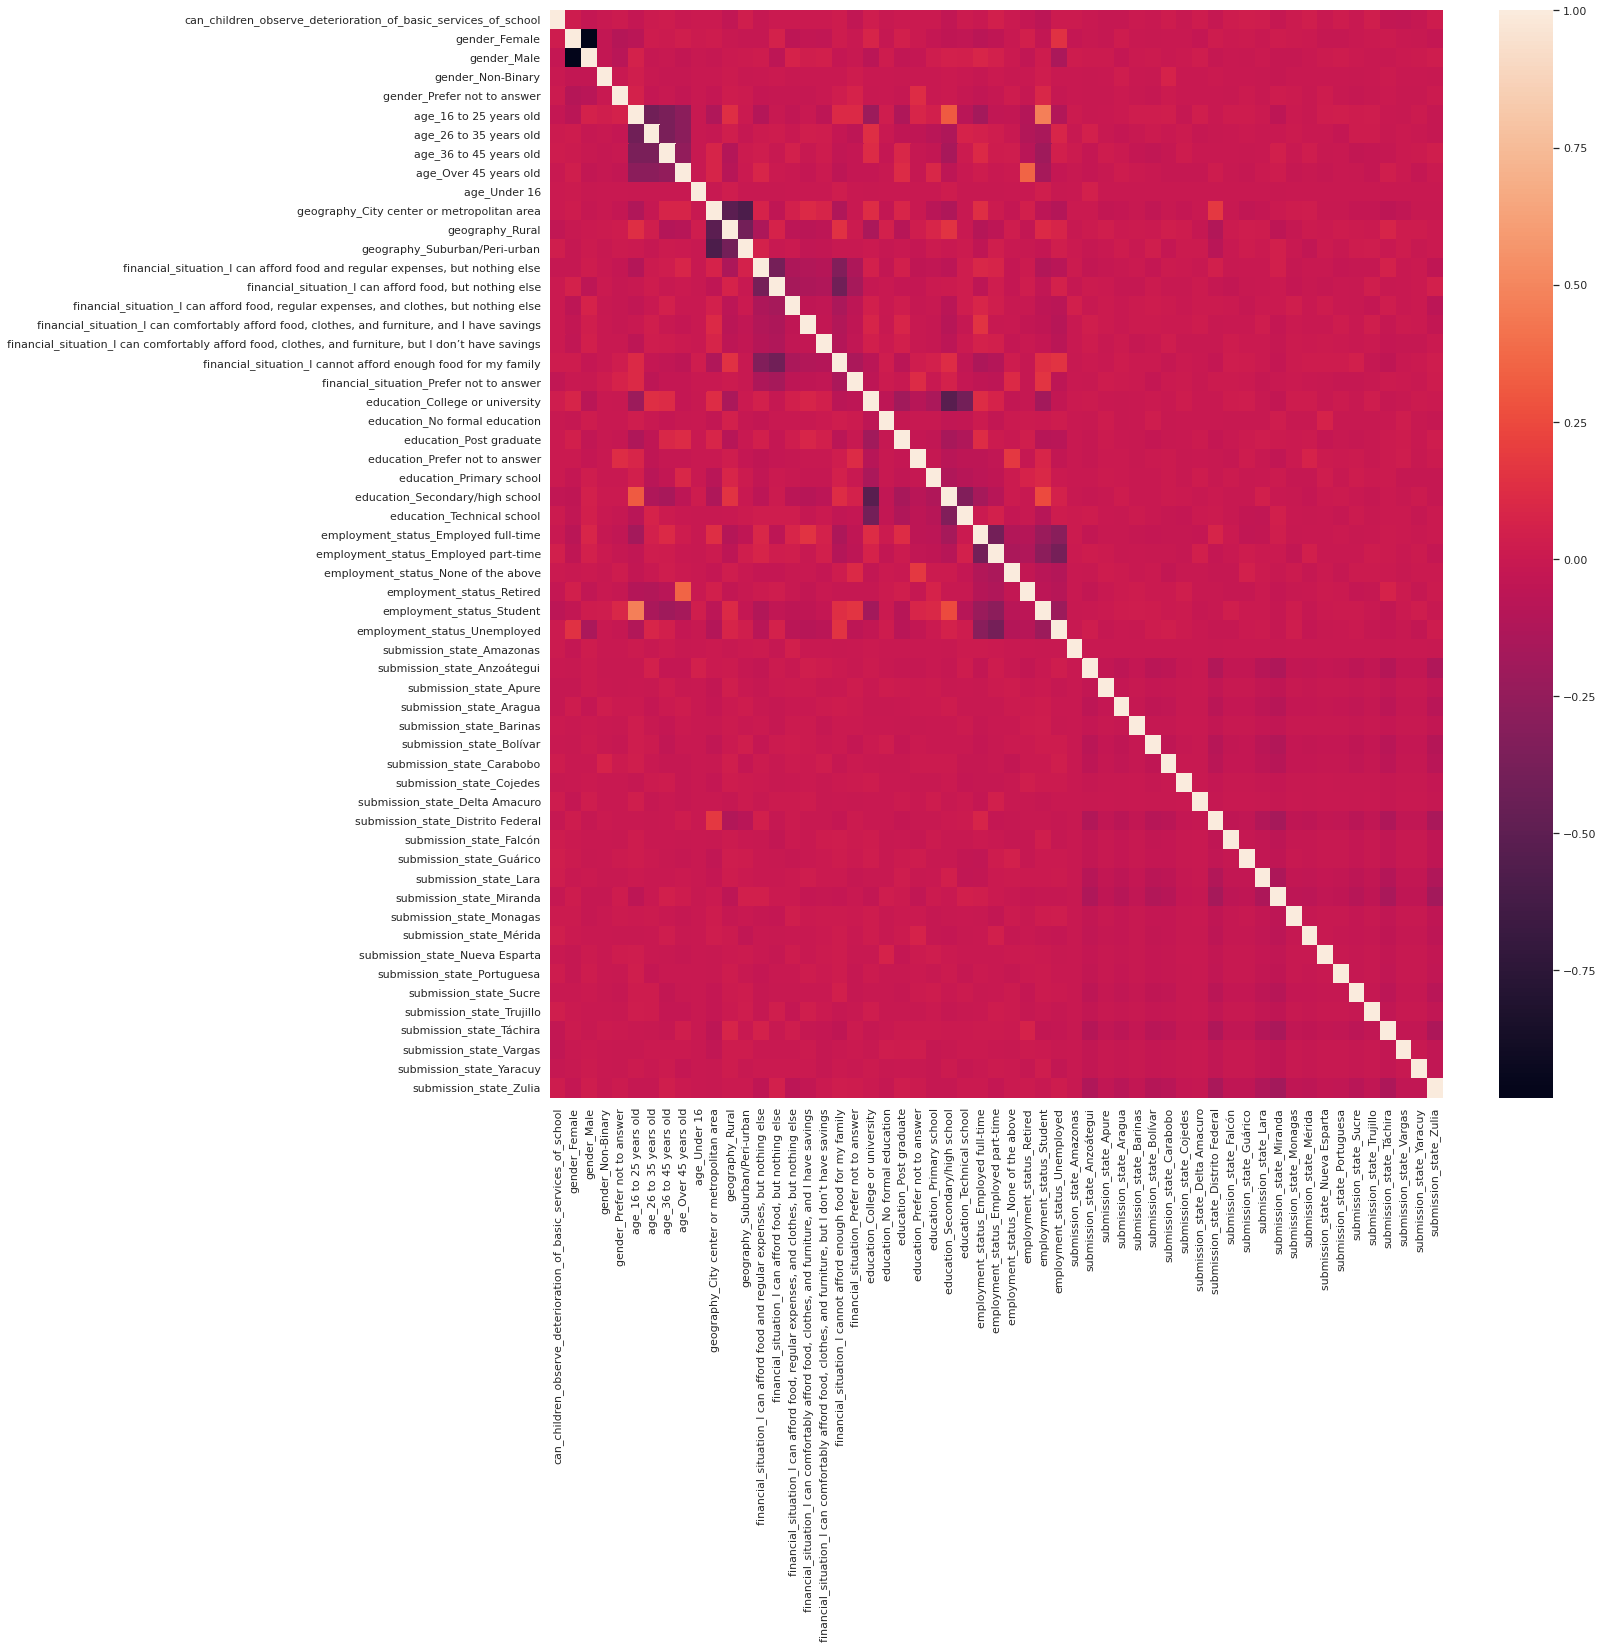

In [647]:
plt.figure(figsize=(20, 20))
sns.heatmap(one_hot_encoded_data.corr())

In [649]:
df = one_hot_encoded_data
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [660]:
for index, value in sorted(sol.items(),reverse=True):
  if value>0.20:
    print(index)

('geography_Rural', 'geography_Suburban/Peri-urban')
('geography_City center or metropolitan area', 'geography_Suburban/Peri-urban')
('geography_City center or metropolitan area', 'geography_Rural')
('gender_Female', 'gender_Male')
('financial_situation_I can afford food, but nothing else', 'financial_situation_I cannot afford enough food for my family')
('financial_situation_I can afford food and regular expenses, but nothing else', 'financial_situation_I cannot afford enough food for my family')
('financial_situation_I can afford food and regular expenses, but nothing else', 'financial_situation_I can afford food, but nothing else')
('employment_status_Student', 'employment_status_Unemployed')
('employment_status_Employed part-time', 'employment_status_Unemployed')
('employment_status_Employed part-time', 'employment_status_Student')
('employment_status_Employed full-time', 'employment_status_Unemployed')
('employment_status_Employed full-time', 'employment_status_Student')
('employm